In [1]:
import findspark
findspark.init()

In [2]:
import pyspark
from pyspark.sql import SparkSession

In [3]:
spark = SparkSession.builder.appName("Data_Wrangling").getOrCreate()

22/01/19 12:46:04 WARN Utils: Your hostname, Rose resolves to a loopback address: 127.0.1.1; using 192.168.1.14 instead (on interface enp3s0)
22/01/19 12:46:04 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
22/01/19 12:46:04 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


In [4]:
file_location = "./movie_data_part1.csv"
file_type = "csv"
infer_schema = "False"
first_row_is_header = "True"
delimiter = "|"

df = spark.read.format(file_type) \
    .option("inferSchema", infer_schema) \
    .option("header", first_row_is_header) \
    .option("sep", delimiter) \
    .load(file_location)

In [5]:
df.printSchema()

root
 |-- belongs_to_collection: string (nullable = true)
 |-- budget: string (nullable = true)
 |-- id: string (nullable = true)
 |-- original_language: string (nullable = true)
 |-- original_title: string (nullable = true)
 |-- overview: string (nullable = true)
 |-- popularity: string (nullable = true)
 |-- production_companies: string (nullable = true)
 |-- production_countries: string (nullable = true)
 |-- release_date: string (nullable = true)
 |-- revenue: string (nullable = true)
 |-- runtime: string (nullable = true)
 |-- status: string (nullable = true)
 |-- tagline: string (nullable = true)
 |-- title: string (nullable = true)
 |-- vote_average: string (nullable = true)



In [6]:
df.dtypes

[('belongs_to_collection', 'string'),
 ('budget', 'string'),
 ('id', 'string'),
 ('original_language', 'string'),
 ('original_title', 'string'),
 ('overview', 'string'),
 ('popularity', 'string'),
 ('production_companies', 'string'),
 ('production_countries', 'string'),
 ('release_date', 'string'),
 ('revenue', 'string'),
 ('runtime', 'string'),
 ('status', 'string'),
 ('tagline', 'string'),
 ('title', 'string'),
 ('vote_average', 'string')]

In [7]:
df.count()

43998

In [8]:
select_columns = ['id', 'budget', 'popularity', 'release_date', 'revenue', 'title']
df = df.select(select_columns)
df.show()

+-----+-------+------------------+------------+-------+--------------------+
|   id| budget|        popularity|release_date|revenue|               title|
+-----+-------+------------------+------------+-------+--------------------+
|43000|      0|             2.503|  1962-05-23|      0|The Elusive Corporal|
|43001|      0|              5.51|  1962-11-12|      0|  Sundays and Cybele|
|43002|      0|              5.62|  1962-05-24|      0|Lonely Are the Brave|
|43003|      0|             7.159|  1975-03-12|      0|          F for Fake|
|43004| 500000|             3.988|  1962-10-09|      0|Long Day's Journe...|
|43006|      0|             3.194|  1962-03-09|      0|           My Geisha|
|43007|      0|             2.689|  1962-10-31|      0|Period of Adjustment|
|43008|      0|             6.537|  1959-03-13|      0|    The Hanging Tree|
|43010|      0|             4.297|  1962-01-01|      0|Sherlock Holmes a...|
|43011|      0|             4.417|  1962-01-01|      0|  Sodom and Gomorrah|

In [9]:
df.select('id','budget','popularity','release_date','revenue','title').show()

+-----+-------+------------------+------------+-------+--------------------+
|   id| budget|        popularity|release_date|revenue|               title|
+-----+-------+------------------+------------+-------+--------------------+
|43000|      0|             2.503|  1962-05-23|      0|The Elusive Corporal|
|43001|      0|              5.51|  1962-11-12|      0|  Sundays and Cybele|
|43002|      0|              5.62|  1962-05-24|      0|Lonely Are the Brave|
|43003|      0|             7.159|  1975-03-12|      0|          F for Fake|
|43004| 500000|             3.988|  1962-10-09|      0|Long Day's Journe...|
|43006|      0|             3.194|  1962-03-09|      0|           My Geisha|
|43007|      0|             2.689|  1962-10-31|      0|Period of Adjustment|
|43008|      0|             6.537|  1959-03-13|      0|    The Hanging Tree|
|43010|      0|             4.297|  1962-01-01|      0|Sherlock Holmes a...|
|43011|      0|             4.417|  1962-01-01|      0|  Sodom and Gomorrah|

In [10]:
df.show(25, False)

+-----+-------+------------------+------------+-------+--------------------------------------------------------+
|id   |budget |popularity        |release_date|revenue|title                                                   |
+-----+-------+------------------+------------+-------+--------------------------------------------------------+
|43000|0      |2.503             |1962-05-23  |0      |The Elusive Corporal                                    |
|43001|0      |5.51              |1962-11-12  |0      |Sundays and Cybele                                      |
|43002|0      |5.62              |1962-05-24  |0      |Lonely Are the Brave                                    |
|43003|0      |7.159             |1975-03-12  |0      |F for Fake                                              |
|43004|500000 |3.988             |1962-10-09  |0      |Long Day's Journey Into Night                           |
|43006|0      |3.194             |1962-03-09  |0      |My Geisha                                

In [11]:
from pyspark.sql.functions import *

In [12]:
df.filter((df['popularity']=='')|df['popularity'].isNull()|isnan(df['popularity'])).count()

215

In [13]:
df.select([count(when((col(c)=='') | 
                       col(c).isNull() | 
                       isnan(c), c)).alias(c) for c in df.columns]).show()

+---+------+----------+------------+-------+-----+
| id|budget|popularity|release_date|revenue|title|
+---+------+----------+------------+-------+-----+
|125|   125|       215|         221|    215|  304|
+---+------+----------+------------+-------+-----+



* Gom nhóm theo `title` sau đó đếm.

In [14]:
df.groupBy("title").count().show()

+--------------------+-----+
|               title|count|
+--------------------+-----+
|   The Corn Is Green|    1|
|Meet The Browns -...|    1|
|Morenita, El Esca...|    1|
| Father Takes a Wife|    1|
|The Werewolf of W...|    1|
|My Wife Is a Gang...|    1|
|Depeche Mode: Tou...|    1|
|  A Woman Is a Woman|    1|
|History Is Made a...|    1|
|      Colombian Love|    1|
|        Ace Attorney|    1|
|     Not Like Others|    1|
|40 Guns to Apache...|    1|
|          Middle Men|    1|
|         It's a Gift|    1|
|    La Vie de Bohème|    1|
|Rasputin: The Mad...|    1|
|The Ballad of Jac...|    1|
|         How to Deal|    1|
|             Freaked|    1|
+--------------------+-----+
only showing top 20 rows



* Gom nhóm theo `title` sau đó sắp xếp giảm dần dựa theo số lượng của nhóm.

In [15]:
df.groupBy('title').count().sort(desc('count')).show(truncate=False)

+-----------------------------+-----+
|title                        |count|
+-----------------------------+-----+
|null                         |304  |
|Les Misérables               |8    |
|The Three Musketeers         |8    |
|Cinderella                   |8    |
|Frankenstein                 |7    |
|Hamlet                       |7    |
|A Christmas Carol            |7    |
|Dracula                      |7    |
|The Island                   |7    |
|Cleopatra                    |6    |
|The Lost World               |6    |
|Framed                       |6    |
|Borderline                   |6    |
|Treasure Island              |6    |
|First Love                   |6    |
|Crime and Punishment         |6    |
|Beauty and the Beast         |6    |
|The Hound of the Baskervilles|6    |
|The Hunchback of Notre Dame  |5    |
|Impulse                      |5    |
+-----------------------------+-----+
only showing top 20 rows



In [16]:
df_temp = df.filter((col('title') != "") &
                    (col('title').isNotNull()) &
                    (~isnan('title')))
df_temp.show()

+-----+-------+------------------+------------+-------+--------------------+
|   id| budget|        popularity|release_date|revenue|               title|
+-----+-------+------------------+------------+-------+--------------------+
|43000|      0|             2.503|  1962-05-23|      0|The Elusive Corporal|
|43001|      0|              5.51|  1962-11-12|      0|  Sundays and Cybele|
|43002|      0|              5.62|  1962-05-24|      0|Lonely Are the Brave|
|43003|      0|             7.159|  1975-03-12|      0|          F for Fake|
|43004| 500000|             3.988|  1962-10-09|      0|Long Day's Journe...|
|43006|      0|             3.194|  1962-03-09|      0|           My Geisha|
|43007|      0|             2.689|  1962-10-31|      0|Period of Adjustment|
|43008|      0|             6.537|  1959-03-13|      0|    The Hanging Tree|
|43010|      0|             4.297|  1962-01-01|      0|Sherlock Holmes a...|
|43011|      0|             4.417|  1962-01-01|      0|  Sodom and Gomorrah|

In [17]:
df_temp.groupBy('title').count().filter("`count` > 4")\
        .sort(col('count').desc()).show(truncate=False)

+-----------------------------+-----+
|title                        |count|
+-----------------------------+-----+
|Cinderella                   |8    |
|Les Misérables               |8    |
|The Three Musketeers         |8    |
|Dracula                      |7    |
|The Island                   |7    |
|A Christmas Carol            |7    |
|Frankenstein                 |7    |
|Hamlet                       |7    |
|Framed                       |6    |
|Cleopatra                    |6    |
|First Love                   |6    |
|The Lost World               |6    |
|Borderline                   |6    |
|Treasure Island              |6    |
|Beauty and the Beast         |6    |
|Crime and Punishment         |6    |
|The Hound of the Baskervilles|6    |
|Dr. Jekyll and Mr. Hyde      |5    |
|Nightmare                    |5    |
|The Visitor                  |5    |
+-----------------------------+-----+
only showing top 20 rows



In [18]:
df_temp.groupBy('title').count().filter("`count` >= 4")\
    .sort(desc('count')).count()

111

In [19]:
del df_temp

In [20]:
df.dtypes

[('id', 'string'),
 ('budget', 'string'),
 ('popularity', 'string'),
 ('release_date', 'string'),
 ('revenue', 'string'),
 ('title', 'string')]

In [21]:
df = df.withColumn('budget', col('budget').cast('float'))
df.dtypes

[('id', 'string'),
 ('budget', 'float'),
 ('popularity', 'string'),
 ('release_date', 'string'),
 ('revenue', 'string'),
 ('title', 'string')]

In [22]:
from pyspark.sql.types import *

In [23]:
int_vars = ['id']
float_vars = ['budget', 'popularity', 'revenue']
date_vars = ['release_date']

for c in int_vars:
    df = df.withColumn(c, df[c].cast(IntegerType()))
    
for c in float_vars:
    df = df.withColumn(c, df[c].cast(FloatType()))
    
for c in date_vars:
    df = df.withColumn(c, df[c].cast(DateType()))
    
df.dtypes

[('id', 'int'),
 ('budget', 'float'),
 ('popularity', 'float'),
 ('release_date', 'date'),
 ('revenue', 'float'),
 ('title', 'string')]

In [24]:
df.show()

+-----+---------+----------+------------+---------+--------------------+
|   id|   budget|popularity|release_date|  revenue|               title|
+-----+---------+----------+------------+---------+--------------------+
|43000|      0.0|     2.503|  1962-05-23|      0.0|The Elusive Corporal|
|43001|      0.0|      5.51|  1962-11-12|      0.0|  Sundays and Cybele|
|43002|      0.0|      5.62|  1962-05-24|      0.0|Lonely Are the Brave|
|43003|      0.0|     7.159|  1975-03-12|      0.0|          F for Fake|
|43004| 500000.0|     3.988|  1962-10-09|      0.0|Long Day's Journe...|
|43006|      0.0|     3.194|  1962-03-09|      0.0|           My Geisha|
|43007|      0.0|     2.689|  1962-10-31|      0.0|Period of Adjustment|
|43008|      0.0|     6.537|  1959-03-13|      0.0|    The Hanging Tree|
|43010|      0.0|     4.297|  1962-01-01|      0.0|Sherlock Holmes a...|
|43011|      0.0|     4.417|  1962-01-01|      0.0|  Sodom and Gomorrah|
|43012|7000000.0|     4.722|  1962-11-21|4000000.0|

In [25]:
df.describe().show()

+-------+------------------+--------------------+-----------------+-------------------+--------------------+
|summary|                id|              budget|       popularity|            revenue|               title|
+-------+------------------+--------------------+-----------------+-------------------+--------------------+
|  count|             43784|               43873|            43783|              43783|               43694|
|   mean|44502.304312077475|   3736901.834963167|5.295444259579189|  9697079.597382545|            Infinity|
| stddev|27189.646588626394|1.5871814952777326E7|6.168030519208252|5.687938449628811E7|                 NaN|
|    min|                 2|                 0.0|              0.6|                0.0|!Women Art Revolu...|
|    max|            100988|               3.8E8|            180.0|       2.78796518E9|       시크릿 Secret|
+-------+------------------+--------------------+-----------------+-------------------+--------------------+



In [26]:
df_temp = df.filter((col('budget') != 0) & 
                    (col('budget').isNotNull()) &
                    (~isnan('budget')))

median = df_temp.approxQuantile('budget', [0.5], 0.1)

median

[5000000.0]

In [27]:
df.agg(countDistinct(col("title")).alias("count")).show()

+-----+
|count|
+-----+
|41138|
+-----+



In [28]:
df.select('title').distinct().show(10,False)

+---------------------------------------------+
|title                                        |
+---------------------------------------------+
|The Corn Is Green                            |
|Meet The Browns - The Play                   |
|Morenita, El Escandalo                       |
|Father Takes a Wife                          |
|The Werewolf of Washington                   |
|My Wife Is a Gangster                        |
|Depeche Mode: Touring the Angel Live in Milan|
|A Woman Is a Woman                           |
|History Is Made at Night                     |
|Colombian Love                               |
+---------------------------------------------+
only showing top 10 rows



* Lấy ra năm của `DateType` bằng hàm `year()`.

In [29]:
df_temp=df.withColumn('release_year',year('release_date'))
df_temp.show()

+-----+---------+----------+------------+---------+--------------------+------------+
|   id|   budget|popularity|release_date|  revenue|               title|release_year|
+-----+---------+----------+------------+---------+--------------------+------------+
|43000|      0.0|     2.503|  1962-05-23|      0.0|The Elusive Corporal|        1962|
|43001|      0.0|      5.51|  1962-11-12|      0.0|  Sundays and Cybele|        1962|
|43002|      0.0|      5.62|  1962-05-24|      0.0|Lonely Are the Brave|        1962|
|43003|      0.0|     7.159|  1975-03-12|      0.0|          F for Fake|        1975|
|43004| 500000.0|     3.988|  1962-10-09|      0.0|Long Day's Journe...|        1962|
|43006|      0.0|     3.194|  1962-03-09|      0.0|           My Geisha|        1962|
|43007|      0.0|     2.689|  1962-10-31|      0.0|Period of Adjustment|        1962|
|43008|      0.0|     6.537|  1959-03-13|      0.0|    The Hanging Tree|        1959|
|43010|      0.0|     4.297|  1962-01-01|      0.0|She

* Lấy ra tháng của `DateType` bằng hàm `month()`.

In [30]:
df_temp = df_temp.withColumn('release_momth', month('release_date'))

df_temp.show()

+-----+---------+----------+------------+---------+--------------------+------------+-------------+
|   id|   budget|popularity|release_date|  revenue|               title|release_year|release_momth|
+-----+---------+----------+------------+---------+--------------------+------------+-------------+
|43000|      0.0|     2.503|  1962-05-23|      0.0|The Elusive Corporal|        1962|            5|
|43001|      0.0|      5.51|  1962-11-12|      0.0|  Sundays and Cybele|        1962|           11|
|43002|      0.0|      5.62|  1962-05-24|      0.0|Lonely Are the Brave|        1962|            5|
|43003|      0.0|     7.159|  1975-03-12|      0.0|          F for Fake|        1975|            3|
|43004| 500000.0|     3.988|  1962-10-09|      0.0|Long Day's Journe...|        1962|           10|
|43006|      0.0|     3.194|  1962-03-09|      0.0|           My Geisha|        1962|            3|
|43007|      0.0|     2.689|  1962-10-31|      0.0|Period of Adjustment|        1962|           10|


* Lấy ra ngày trong tháng từ `DateType` bằng hàm `dayofmonth()`.

In [31]:
df_temp = df_temp.withColumn('release_day', dayofmonth('release_date'))
df_temp.show()

+-----+---------+----------+------------+---------+--------------------+------------+-------------+-----------+
|   id|   budget|popularity|release_date|  revenue|               title|release_year|release_momth|release_day|
+-----+---------+----------+------------+---------+--------------------+------------+-------------+-----------+
|43000|      0.0|     2.503|  1962-05-23|      0.0|The Elusive Corporal|        1962|            5|         23|
|43001|      0.0|      5.51|  1962-11-12|      0.0|  Sundays and Cybele|        1962|           11|         12|
|43002|      0.0|      5.62|  1962-05-24|      0.0|Lonely Are the Brave|        1962|            5|         24|
|43003|      0.0|     7.159|  1975-03-12|      0.0|          F for Fake|        1975|            3|         12|
|43004| 500000.0|     3.988|  1962-10-09|      0.0|Long Day's Journe...|        1962|           10|          9|
|43006|      0.0|     3.194|  1962-03-09|      0.0|           My Geisha|        1962|            3|     

* Nhóm theo năm và đếm.

In [32]:
df_temp.groupBy('release_year').count().show()

+------------+-----+
|release_year|count|
+------------+-----+
|        1959|  271|
|        1990|  496|
|        1975|  365|
|        1977|  415|
|        1924|   19|
|        2003| 1202|
|        2007| 1901|
|        2018|    4|
|        1974|  434|
|        2015|   13|
|        1927|   30|
|        1955|  247|
|        2006| 1721|
|        1978|  385|
|        1925|   26|
|        1961|  242|
|        2013|  106|
|        1942|  202|
|        1944|  144|
|        1939|  147|
+------------+-----+
only showing top 20 rows



In [33]:
df_temp.groupBy('release_year').agg(countDistinct('title')).show()

+------------+------------+
|release_year|count(title)|
+------------+------------+
|        1959|         271|
|        1990|         496|
|        1975|         365|
|        1977|         415|
|        1924|          19|
|        2003|        1199|
|        2007|        1896|
|        2018|           4|
|        1974|         434|
|        2015|          13|
|        1927|          30|
|        1955|         247|
|        2006|        1719|
|        1978|         385|
|        1925|          26|
|        1961|         242|
|        2013|         106|
|        1942|         202|
|        1939|         147|
|        1944|         144|
+------------+------------+
only showing top 20 rows



# Lọc
* Có thể lọc dữ liệu bằng hàm:
  * `where()`: lọc theo style SQL.
  * `filter()`: lọc theo lambda method. 

/ Lọc ra các record mà có `title` bắt đầu bằng "Meet".

In [34]:
df.filter(col('title').like('Meet%')).show()

+-----+---------+----------+------------+------------+--------------------+
|   id|   budget|popularity|release_date|     revenue|               title|
+-----+---------+----------+------------+------------+--------------------+
|43957| 500000.0|     2.649|  2005-06-28|   1000000.0|Meet The Browns -...|
|39997|      0.0|     3.585|  1989-11-15|         0.0|Meet the Hollowheads|
|16710|      0.0|    11.495|  2008-03-21| 4.1939392E7|     Meet the Browns|
|20430|      0.0|     3.614|  2004-01-29|         0.0|         Meet Market|
|76435|      0.0|     1.775|  2011-03-31|         0.0|    Meet the In-Laws|
|76516|5000000.0|      4.05|  1990-11-08|    485772.0| Meet the Applegates|
| 7278|    3.0E7|    11.116|  2008-01-24| 8.4646832E7|   Meet the Spartans|
|32574|      0.0|      7.42|  1941-03-14|         0.0|       Meet John Doe|
|40506|      0.0|     4.814|  1997-01-31|         0.0|   Meet Wally Sparks|
|40688|    2.4E7|     6.848|  1998-03-27|   4562146.0|    Meet the Deedles|
|58401|     

/ Lọc ra các record mà có `title` **không kết thúc bằng** kí tự "s".

In [35]:
df.filter(~col('title').like('%s')).show(10, False)

+-----+--------+----------+------------+-------+---------------------------------------+
|id   |budget  |popularity|release_date|revenue|title                                  |
+-----+--------+----------+------------+-------+---------------------------------------+
|43000|0.0     |2.503     |1962-05-23  |0.0    |The Elusive Corporal                   |
|43001|0.0     |5.51      |1962-11-12  |0.0    |Sundays and Cybele                     |
|43002|0.0     |5.62      |1962-05-24  |0.0    |Lonely Are the Brave                   |
|43003|0.0     |7.159     |1975-03-12  |0.0    |F for Fake                             |
|43004|500000.0|3.988     |1962-10-09  |0.0    |Long Day's Journey Into Night          |
|43006|0.0     |3.194     |1962-03-09  |0.0    |My Geisha                              |
|43007|0.0     |2.689     |1962-10-31  |0.0    |Period of Adjustment                   |
|43008|0.0     |6.537     |1959-03-13  |0.0    |The Hanging Tree                       |
|43010|0.0     |4.297

/ Kết hợp với Regex để lọc ra các record mà có record mà chứa chuổi "ove" trong `title`.

In [36]:
# cách 1
df.filter(col('title').rlike("\w*ove")).show()

+-----+------+----------+------------+------------+--------------------+
|   id|budget|popularity|release_date|     revenue|               title|
+-----+------+----------+------------+------------+--------------------+
|43100|   0.0|     7.252|  1959-10-07|         0.0|General Della Rovere|
|43152|   0.0|     5.126|  2001-06-21|         0.0|      Love on a Diet|
|43191|   0.0|     4.921|  1952-08-29|         0.0|   Beware, My Lovely|
|43281|   0.0|     2.411|  1989-11-22|         0.0|   Love Without Pity|
|43343|   0.0|     3.174|  1953-12-25|         0.0|        Easy to Love|
|43347| 3.0E7|    14.863|  2010-11-22|1.02820008E8|  Love & Other Drugs|
|43362|   0.0|     1.705|  1952-02-23|         0.0|Love Is Better Th...|
|43363|   0.0|      2.02|  1952-05-29|         0.0|   Lovely to Look At|
|43395|   0.0|     4.758|  1950-11-10|         0.0| Two Weeks with Love|
|43455|   0.0|     4.669|  1948-08-23|         0.0| The Loves of Carmen|
|43483|   0.0|     3.161|  1946-12-25|         0.0|

In [37]:
# cách 2
df.filter(df.title.contains("ove")).show()

+-----+------+----------+------------+------------+--------------------+
|   id|budget|popularity|release_date|     revenue|               title|
+-----+------+----------+------------+------------+--------------------+
|43100|   0.0|     7.252|  1959-10-07|         0.0|General Della Rovere|
|43152|   0.0|     5.126|  2001-06-21|         0.0|      Love on a Diet|
|43191|   0.0|     4.921|  1952-08-29|         0.0|   Beware, My Lovely|
|43281|   0.0|     2.411|  1989-11-22|         0.0|   Love Without Pity|
|43343|   0.0|     3.174|  1953-12-25|         0.0|        Easy to Love|
|43347| 3.0E7|    14.863|  2010-11-22|1.02820008E8|  Love & Other Drugs|
|43362|   0.0|     1.705|  1952-02-23|         0.0|Love Is Better Th...|
|43363|   0.0|      2.02|  1952-05-29|         0.0|   Lovely to Look At|
|43395|   0.0|     4.758|  1950-11-10|         0.0| Two Weeks with Love|
|43455|   0.0|     4.669|  1948-08-23|         0.0| The Loves of Carmen|
|43483|   0.0|     3.161|  1946-12-25|         0.0|

/ Lọc ra các cột mà tên cột **bắt đầu** bằng chuổi "re".

In [38]:
df.select(df.colRegex("`re\w*`")).printSchema()

root
 |-- release_date: date (nullable = true)
 |-- revenue: float (nullable = true)



/ Lọc ra các cột mà có tên cột **kết thúc** bằng kí tự "e".

In [39]:
df.select(df.colRegex("`\w*e`")).printSchema()

root
 |-- release_date: date (nullable = true)
 |-- revenue: float (nullable = true)
 |-- title: string (nullable = true)



* <span style="color: red">Xem thêm nhắc nhở của tác giá về Regex tại trang 54.</span>

# Tạo cột mới

* Giả sử bây giờ ta cần tính phương sai theo công thức sau:
  $$S^2 = \sum \dfrac{(X_i - \overline{X})^2}{(n - 1)}$$

* Tính mean

In [40]:
mean_pop=df.agg({'popularity': 'mean'}).collect()[0]['avg(popularity)']
count_obs= df.count()

mean_pop

5.295444259579189

In [41]:
count_obs

43998

In [42]:
df = df.withColumn("mean_popularity", lit(mean_pop))
df.show()

+-----+---------+----------+------------+---------+--------------------+-----------------+
|   id|   budget|popularity|release_date|  revenue|               title|  mean_popularity|
+-----+---------+----------+------------+---------+--------------------+-----------------+
|43000|      0.0|     2.503|  1962-05-23|      0.0|The Elusive Corporal|5.295444259579189|
|43001|      0.0|      5.51|  1962-11-12|      0.0|  Sundays and Cybele|5.295444259579189|
|43002|      0.0|      5.62|  1962-05-24|      0.0|Lonely Are the Brave|5.295444259579189|
|43003|      0.0|     7.159|  1975-03-12|      0.0|          F for Fake|5.295444259579189|
|43004| 500000.0|     3.988|  1962-10-09|      0.0|Long Day's Journe...|5.295444259579189|
|43006|      0.0|     3.194|  1962-03-09|      0.0|           My Geisha|5.295444259579189|
|43007|      0.0|     2.689|  1962-10-31|      0.0|Period of Adjustment|5.295444259579189|
|43008|      0.0|     6.537|  1959-03-13|      0.0|    The Hanging Tree|5.295444259579189|

In [43]:
df = df.withColumn('variance', pow(col('popularity') - col('mean_popularity'), 2))
variance_sum = df.agg({'variance': 'sum'}).collect()[0]['sum(variance)']
variance_population = variance_sum / (count_obs - 1)

variance_population

37.858688057662825

In [44]:
def new_cols(budget, popularity):
    if budget<10000000: budget_cat='Small'
    elif budget<100000000: budget_cat='Medium'
    else: budget_cat='Big'
    
    if popularity<3: ratings='Low'
    elif popularity<5: ratings='Mid'
    else: ratings='High'
    
    return budget_cat, ratings

In [45]:
udfB = udf(new_cols, StructType(
    [StructField('budget_cat', StringType(), True),
     StructField('ratings', StringType(), True)]))

In [46]:
temp_df = df.select('id', 'budget', 'popularity')\
            .withColumn('newcat', udfB('budget', 'popularity'))
            
temp_df.show()

+-----+---------+----------+-------------+
|   id|   budget|popularity|       newcat|
+-----+---------+----------+-------------+
|43000|      0.0|     2.503| [Small, Low]|
|43001|      0.0|      5.51|[Small, High]|
|43002|      0.0|      5.62|[Small, High]|
|43003|      0.0|     7.159|[Small, High]|
|43004| 500000.0|     3.988| [Small, Mid]|
|43006|      0.0|     3.194| [Small, Mid]|
|43007|      0.0|     2.689| [Small, Low]|
|43008|      0.0|     6.537|[Small, High]|
|43010|      0.0|     4.297| [Small, Mid]|
|43011|      0.0|     4.417| [Small, Mid]|
|43012|7000000.0|     4.722| [Small, Mid]|
|43013|      0.0|     2.543| [Small, Low]|
|43014|      0.0|     4.303| [Small, Mid]|
|43015|      0.0|     3.493| [Small, Mid]|
|43016|      0.0|     2.851| [Small, Low]|
|43017|      0.0|     4.047| [Small, Mid]|
|43018|      0.0|     2.661| [Small, Low]|
|43019|      0.0|     3.225| [Small, Mid]|
|43020|      0.0|      5.72|[Small, High]|
|43021|      0.0|     3.292| [Small, Mid]|
+-----+----

In [47]:
df_with_newcols = temp_df.select('id', 'budget', 'popularity', 'newcat')\
                            .withColumn('budget_cat', col('newcat').getItem('budget_cat'))\
                            .withColumn('ratings', col('newcat').getItem('ratings'))\
                            .drop('newcat')
                            
df_with_newcols.show(truncate=False)

+-----+---------+----------+----------+-------+
|id   |budget   |popularity|budget_cat|ratings|
+-----+---------+----------+----------+-------+
|43000|0.0      |2.503     |Small     |Low    |
|43001|0.0      |5.51      |Small     |High   |
|43002|0.0      |5.62      |Small     |High   |
|43003|0.0      |7.159     |Small     |High   |
|43004|500000.0 |3.988     |Small     |Mid    |
|43006|0.0      |3.194     |Small     |Mid    |
|43007|0.0      |2.689     |Small     |Low    |
|43008|0.0      |6.537     |Small     |High   |
|43010|0.0      |4.297     |Small     |Mid    |
|43011|0.0      |4.417     |Small     |Mid    |
|43012|7000000.0|4.722     |Small     |Mid    |
|43013|0.0      |2.543     |Small     |Low    |
|43014|0.0      |4.303     |Small     |Mid    |
|43015|0.0      |3.493     |Small     |Mid    |
|43016|0.0      |2.851     |Small     |Low    |
|43017|0.0      |4.047     |Small     |Mid    |
|43018|0.0      |2.661     |Small     |Low    |
|43019|0.0      |3.225     |Small     |M

In [48]:
columns_to_drop = ['budget_cat']
df_with_newcols = df_with_newcols.drop(*columns_to_drop)
df_with_newcols = df_with_newcols.withColumnRenamed('id', 'film_id')\
                                    .withColumnRenamed('ratings', 'film_ratings')
                                    
new_names = [('budget', 'film_budget'), ('popularity', 'film_popularity')]
df_with_newcols_renamed = df_with_newcols\
        .select(list(map(lambda old, new: col(old).alias(new), *zip(*new_names))))
        
df_with_newcols_renamed.show()

+-----------+---------------+
|film_budget|film_popularity|
+-----------+---------------+
|        0.0|          2.503|
|        0.0|           5.51|
|        0.0|           5.62|
|        0.0|          7.159|
|   500000.0|          3.988|
|        0.0|          3.194|
|        0.0|          2.689|
|        0.0|          6.537|
|        0.0|          4.297|
|        0.0|          4.417|
|  7000000.0|          4.722|
|        0.0|          2.543|
|        0.0|          4.303|
|        0.0|          3.493|
|        0.0|          2.851|
|        0.0|          4.047|
|        0.0|          2.661|
|        0.0|          3.225|
|        0.0|           5.72|
|        0.0|          3.292|
+-----------+---------------+
only showing top 20 rows



In [49]:
df_with_newcols = df.select('id', 'budget', 'popularity')\
    .withColumn('budget_cat', 
                when(col('budget') < 10000000, 'Small')\
                .when(col('budget') < 100000000, "Medium").otherwise('Big'))\
    .withColumn('ratings', 
                when(col('popularity') < 3, 'Low')\
                .when(col('popularity') < 5, 'Mid').otherwise('High'))
    
df_with_newcols = df_with_newcols.withColumn('BudgetRating_Category',
                                             concat(col('budget_cat'), col('ratings')))

df_with_newcols = df_with_newcols.withColumn('BudgetRating_Category', 
                                             trim(lower(col('BudgetRating_Category'))))

df_with_newcols.show()

+-----+---------+----------+----------+-------+---------------------+
|   id|   budget|popularity|budget_cat|ratings|BudgetRating_Category|
+-----+---------+----------+----------+-------+---------------------+
|43000|      0.0|     2.503|     Small|    Low|             smalllow|
|43001|      0.0|      5.51|     Small|   High|            smallhigh|
|43002|      0.0|      5.62|     Small|   High|            smallhigh|
|43003|      0.0|     7.159|     Small|   High|            smallhigh|
|43004| 500000.0|     3.988|     Small|    Mid|             smallmid|
|43006|      0.0|     3.194|     Small|    Mid|             smallmid|
|43007|      0.0|     2.689|     Small|    Low|             smalllow|
|43008|      0.0|     6.537|     Small|   High|            smallhigh|
|43010|      0.0|     4.297|     Small|    Mid|             smallmid|
|43011|      0.0|     4.417|     Small|    Mid|             smallmid|
|43012|7000000.0|     4.722|     Small|    Mid|             smallmid|
|43013|      0.0|   

# <span style="color: red">CHAPTER 3: HERE</span>

In [50]:
df_with_newcols.registerTempTable('temp_data')
spark.sql("""
          select ratings, count(ratings) 
          from temp_data 
          group by ratings""").show()

+-------+--------------+
|ratings|count(ratings)|
+-------+--------------+
|   High|         16856|
|    Low|         14865|
|    Mid|         12277|
+-------+--------------+



In [51]:
df_with_newcols = df_with_newcols.filter(col('popularity').isNotNull() & 
                                         (~isnan('popularity')))

df_with_newcols.show()

+-----+---------+----------+----------+-------+---------------------+
|   id|   budget|popularity|budget_cat|ratings|BudgetRating_Category|
+-----+---------+----------+----------+-------+---------------------+
|43000|      0.0|     2.503|     Small|    Low|             smalllow|
|43001|      0.0|      5.51|     Small|   High|            smallhigh|
|43002|      0.0|      5.62|     Small|   High|            smallhigh|
|43003|      0.0|     7.159|     Small|   High|            smallhigh|
|43004| 500000.0|     3.988|     Small|    Mid|             smallmid|
|43006|      0.0|     3.194|     Small|    Mid|             smallmid|
|43007|      0.0|     2.689|     Small|    Low|             smalllow|
|43008|      0.0|     6.537|     Small|   High|            smallhigh|
|43010|      0.0|     4.297|     Small|    Mid|             smallmid|
|43011|      0.0|     4.417|     Small|    Mid|             smallmid|
|43012|7000000.0|     4.722|     Small|    Mid|             smallmid|
|43013|      0.0|   

In [52]:
from pyspark.sql.window import *

In [53]:
df_with_newcols = df_with_newcols.select('id', 'budget', 'popularity', 
                                         ntile(10).over(Window.partitionBy()
                                                .orderBy(col('popularity')
                                                         .desc())).alias('decile_rank'))

df_with_newcols.groupBy('decile_rank').agg(min('popularity').alias('min_popularity'), 
                                           max('popularity').alias('max_popularity'), 
                                           count('popularity')).show()


22/01/19 12:46:40 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


+-----------+--------------+--------------+-----------------+
|decile_rank|min_popularity|max_popularity|count(popularity)|
+-----------+--------------+--------------+-----------------+
|          1|        10.185|         180.0|             4379|
|          2|         7.481|        10.182|             4379|
|          3|         5.841|         7.481|             4379|
|          4|         4.823|         5.841|             4378|
|          5|         4.054|         4.822|             4378|
|          6|         3.383|         4.054|             4378|
|          7|         2.747|         3.383|             4378|
|          8|         2.075|         2.747|             4378|
|          9|         1.389|         2.075|             4378|
|         10|           0.6|         1.389|             4378|
+-----------+--------------+--------------+-----------------+



* Tìm bộ phim nổi tiếng thứ hai vào năm 1970.

In [54]:
df_second_best = df.select('id', 'popularity', 'release_date')

df_second_best.show()

+-----+----------+------------+
|   id|popularity|release_date|
+-----+----------+------------+
|43000|     2.503|  1962-05-23|
|43001|      5.51|  1962-11-12|
|43002|      5.62|  1962-05-24|
|43003|     7.159|  1975-03-12|
|43004|     3.988|  1962-10-09|
|43006|     3.194|  1962-03-09|
|43007|     2.689|  1962-10-31|
|43008|     6.537|  1959-03-13|
|43010|     4.297|  1962-01-01|
|43011|     4.417|  1962-01-01|
|43012|     4.722|  1962-11-21|
|43013|     2.543|  1962-04-17|
|43014|     4.303|  1962-10-24|
|43015|     3.493|  1962-12-07|
|43016|     2.851|  1962-01-01|
|43017|     4.047|  1961-10-11|
|43018|     2.661|  1961-06-02|
|43019|     3.225|  2010-05-28|
|43020|      5.72|  1961-06-15|
|43021|     3.292|  2008-08-22|
+-----+----------+------------+
only showing top 20 rows



In [55]:
df_second_best = df_second_best.withColumn('release_year', year('release_date'))\
                                .drop('release_date')
                                
df_second_best.show()

+-----+----------+------------+
|   id|popularity|release_year|
+-----+----------+------------+
|43000|     2.503|        1962|
|43001|      5.51|        1962|
|43002|      5.62|        1962|
|43003|     7.159|        1975|
|43004|     3.988|        1962|
|43006|     3.194|        1962|
|43007|     2.689|        1962|
|43008|     6.537|        1959|
|43010|     4.297|        1962|
|43011|     4.417|        1962|
|43012|     4.722|        1962|
|43013|     2.543|        1962|
|43014|     4.303|        1962|
|43015|     3.493|        1962|
|43016|     2.851|        1962|
|43017|     4.047|        1961|
|43018|     2.661|        1961|
|43019|     3.225|        2010|
|43020|      5.72|        1961|
|43021|     3.292|        2008|
+-----+----------+------------+
only showing top 20 rows



In [56]:
year_window = Window.partitionBy('release_year').orderBy(col('popularity').desc())
df_second_best = df_second_best.select('id', 'popularity', 'release_year', 
                                       rank().over(year_window).alias('rank'))

df_second_best.show()

+-----+----------+------------+----+
|   id|popularity|release_year|rank|
+-----+----------+------------+----+
|10882|      22.1|        1959|   1|
|  213|    16.092|        1959|   2|
|  665|    15.599|        1959|   3|
|  239|    15.368|        1959|   4|
|  301|    12.638|        1959|   5|
|  147|    12.139|        1959|   6|
|10513|     10.36|        1959|   7|
|18887|    10.199|        1959|   8|
|11571|     9.808|        1959|   9|
|14698|     9.806|        1959|  10|
|   93|     9.476|        1959|  11|
|  690|     9.409|        1959|  12|
|62036|     9.324|        1959|  13|
| 5544|     9.292|        1959|  14|
| 9660|     9.226|        1959|  15|
|31217|     9.194|        1959|  16|
|15856|     9.003|        1959|  17|
|18990|     8.942|        1959|  18|
|34528|     8.822|        1959|  19|
|  896|     8.799|        1959|  20|
+-----+----------+------------+----+
only showing top 20 rows



In [57]:
df_second_best.filter((col('release_year') == 1970) & 
                      (col('rank') == 2)).show()

+-----+----------+------------+----+
|   id|popularity|release_year|rank|
+-----+----------+------------+----+
|11202|    14.029|        1970|   2|
+-----+----------+------------+----+



* Đoạn code dưới đây dùng để tìm khoảng cách giữa bộ phim có doanh thu cao nhất so với các bộ phim còn lại.

In [58]:
from pyspark.sql.window import *

* Tạo cột `release_year` từ cột `release_date`.

In [59]:
df_revenue = df.select('id', 'revenue', 'release_date')
df_revenue = df_revenue.withColumn("release_year", year('release_date')).drop('release_date')

df_revenue.show(10)

+-----+-------+------------+
|   id|revenue|release_year|
+-----+-------+------------+
|43000|    0.0|        1962|
|43001|    0.0|        1962|
|43002|    0.0|        1962|
|43003|    0.0|        1975|
|43004|    0.0|        1962|
|43006|    0.0|        1962|
|43007|    0.0|        1962|
|43008|    0.0|        1959|
|43010|    0.0|        1962|
|43011|    0.0|        1962|
+-----+-------+------------+
only showing top 10 rows



In [60]:
windowRev = Window.partitionBy(col('release_year')).orderBy(col('revenue').desc())\
                  .rangeBetween(-sys.maxsize, sys.maxsize)
revenue_difference = max(col('revenue')).over(windowRev) - col('revenue')
df_revenue.select('id', 'revenue', 'release_year', 
                  revenue_difference.alias('revenue_difference')).show(10, False)

+-----+---------+------------+------------------+
|id   |revenue  |release_year|revenue_difference|
+-----+---------+------------+------------------+
|665  |1.64E8   |1959        |0.0               |
|10882|5.1E7    |1959        |1.13E8            |
|239  |2.5E7    |1959        |1.39E8            |
|4952 |1.875E7  |1959        |1.4525E8          |
|15944|1.7658E7 |1959        |1.46342E8         |
|213  |1.3275E7 |1959        |1.50724992E8      |
|27029|1.28E7   |1959        |1.512E8           |
|29996|1.22E7   |1959        |1.518E8           |
|11571|1.0E7    |1959        |1.54E8            |
|9660 |6800000.0|1959        |1.572E8           |
+-----+---------+------------+------------------+
only showing top 10 rows



# Các hàm tiện ích khác
## Collect List
* Giả sử mình muốn tìm tất cả các `year` mà có `title` là "The Lost World".

In [61]:
df = df.withColumn('release_year', year('release_date'))
df.filter("""
          title=='The Lost World'""").groupBy('title')\
  .agg(collect_list('release_year')).show(10, False)

+--------------+------------------------------------+
|title         |collect_list(release_year)          |
+--------------+------------------------------------+
|The Lost World|[1999, 2001, 1925, 1960, 1992, 1998]|
+--------------+------------------------------------+



## Sampling
* Lấy mẫu sẽ bao gồm hai cách:
  * Lấy mẫu có hoàn lại.
  * Lấy mẫu không hoàn lại. 

* Lấy mẫu không hoàn lại.

In [62]:
df_sample = df.sample(False, 0.4, 11) # có hoàn lại hay không, tỉ lệ mẫu cần lấy ra, seed
df_sample.count()

17684

In [63]:
df_sample = df.sample(True, 0.4, 11) # có hoàn lại hay không, tỉ lệ mẫu cần lấy ra, seed
df_sample.count()

17805

* Lấy mẫu phân tầng.

In [64]:
df_strat = df.sampleBy('release_year', 
                       fractions={1959: 0.2, 1960: 0.4, 1961: 0.4}, seed=11)
df_strat.count()

241

## Caching và Persisting
* Caching là một cách lưu trữ dữ liệu tạm thời trong bộ nhớ. Khi lưu trữ dữ liệu vào cache, ta không cần phải thực hiện lại các phép tính để đạt được những kết quả mỗi khi truy cập vào DataFrame, từ đây tiết kiệm được các chi phí nhập/xuất.
* Khi ta cần truy cập vào một DataFrame nhiều lần, tốt nhất là ta nên dùng cache. Không dùng cache nếu ta chỉ truy cập DataFrame duy nhất một lần.
* Spark có năm loại lưu trữ cache.
  * **MEMORY_ONLY**: lưu RDD dưới dạng các Java object. Nếu RDD không vừa với bộ nhớ, một số partition sẽ không được lưu vào cache nhưng sẽ được nhanh chóng tính toán lại nếu cần thiết.
  * **MEMORY_ONLY_SER**: 

# Joins

In [65]:
file_location = "movie_data_part2.csv"
file_type = "csv"
infer_schema = "False"
first_row_is_header = "True"
delimiter = "|"

In [66]:
df_p1 = spark.read.format(file_type)\
            .option("inferSchema", infer_schema)\
            .option("header", first_row_is_header)\
            .option("sep", delimiter)\
            .load(file_location)

In [67]:
df_p1 = df_p1.withColumn('id', col('id').cast("integer"))

In [68]:
df_p1 = df_p1.filter((col('id').isNotNull()) & (~isnan(col('id'))))

In [69]:
df.join(df_p1, df['id'] == df_p1['id'], 'inner').printSchema()
df.join(df_p1, df['id'] == df_p1['id']).count()

root
 |-- id: integer (nullable = true)
 |-- budget: float (nullable = true)
 |-- popularity: float (nullable = true)
 |-- release_date: date (nullable = true)
 |-- revenue: float (nullable = true)
 |-- title: string (nullable = true)
 |-- mean_popularity: double (nullable = false)
 |-- variance: double (nullable = true)
 |-- release_year: integer (nullable = true)
 |-- cast: string (nullable = true)
 |-- adult: string (nullable = true)
 |-- directors: string (nullable = true)
 |-- vote_count: string (nullable = true)
 |-- spoken_languages: string (nullable = true)
 |-- poster_path: string (nullable = true)
 |-- homepage: string (nullable = true)
 |-- imdb_id: string (nullable = true)
 |-- genres: string (nullable = true)
 |-- video: string (nullable = true)
 |-- id: integer (nullable = true)



24998

# Visualization

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
histogram_data = df.select('popularity').rdd.flatMap(lambda x: x).histogram(25)
hist_df = pd.DataFrame(list(zip(*histogram_data)), columns=['bin', 'frequency'])

/home/manhcuong/anaconda3/envs/pyspark_env/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


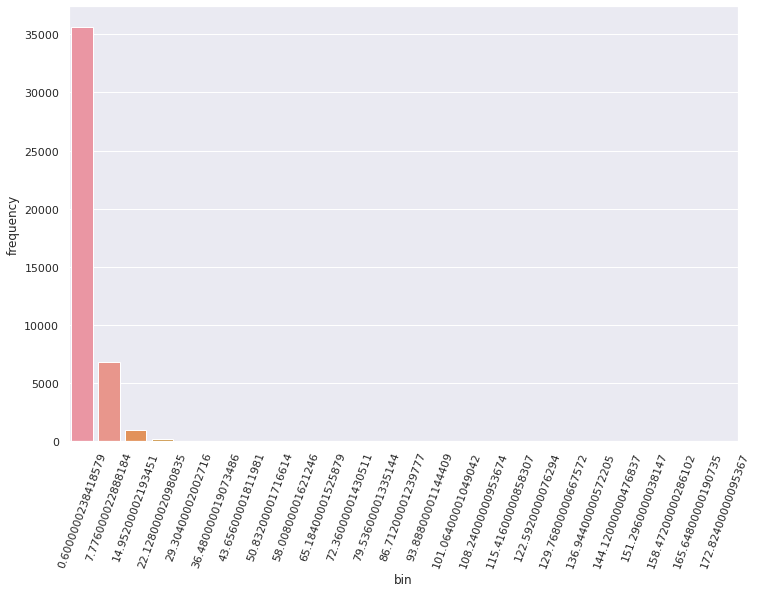

In [80]:
sns.set(rc={'figure.figsize':(12,8)})
sns.barplot(hist_df['bin'], hist_df['frequency'])
plt.xticks(rotation=70)
plt.show()

/home/manhcuong/anaconda3/envs/pyspark_env/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


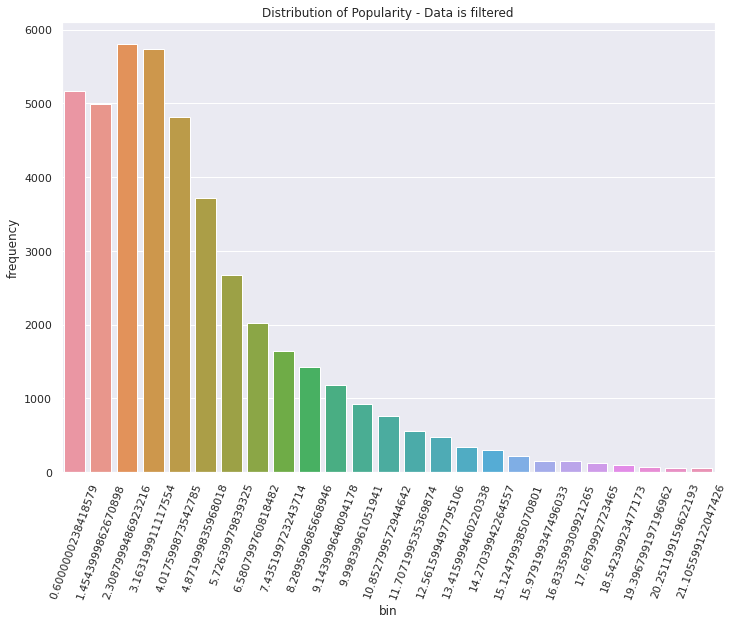

In [81]:
df_fil = df.filter("popularity < 22")
histogram_data = df_fil.select('popularity').rdd.flatMap(lambda x: x).histogram(25)
hist_df = pd.DataFrame(list(zip(*histogram_data)), columns=['bin', 'frequency'])

sns.set(rc={'figure.figsize':(11.7, 8.27)})
sns.barplot(hist_df['bin'], hist_df['frequency'])
plt.xticks(rotation=70)
plt.title("Distribution of Popularity - Data is filtered")
plt.show()

/home/manhcuong/anaconda3/envs/pyspark_env/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


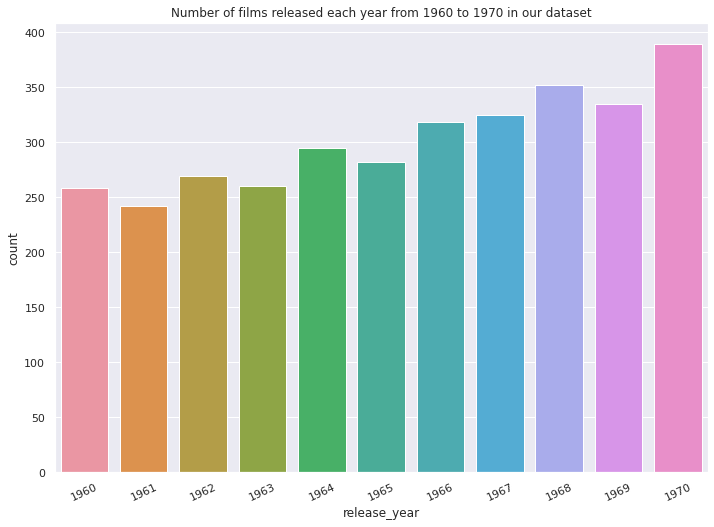

In [84]:
df_cat = df.filter("(release_year > 1959) and (release_year < 1971)")\
            .groupBy('release_year').count().toPandas()
            
df_cat = df_cat.sort_values(by=['release_year'], ascending=False)

sns.set(rc={'figure.figsize':(11.7, 8.27)})
sns.barplot(df_cat['release_year'], df_cat['count'])
plt.xticks(rotation=25)
plt.title("Number of films released each year from 1960 to 1970 in our dataset")
plt.show()